### Advanced Statistics for Physics Analysis - Final project: 
# A fake news classifier using Naive Bayes

$ \textbf {Group members:} $  
Noemi Manara (2022909)\
Giuseppe Simionato (2029013) \
Nicholas Sinigaglia (2029059)

$\textbf{Abstract:}$ \
Fake news are defined by the New York Times as “a made-up story with an intention to deceive”, often to confuse or deceive people. They are everywhere in our daily life and come especially from social media platforms or online world. Being able to distinguish fake contents form real ones is today one
of the most serious challenges facing the news industry.

The goal of this project is to implement a Multinomial Naive Bayes in R language and test its
performance in the classification task of social media posts. 
The Naive Bayes classifier is a family of simple $\textit{"probabilistic classifiers"}$ based on the Bayes' theorem with strong independence assumptions between the features (from this assumptions comes the name naive). Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on predicts the tag of a text such as a piece of email or newspaper article: it calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

We implement this technique using two different dataset, the first is only composed of two classes and the second is made of six different classes.

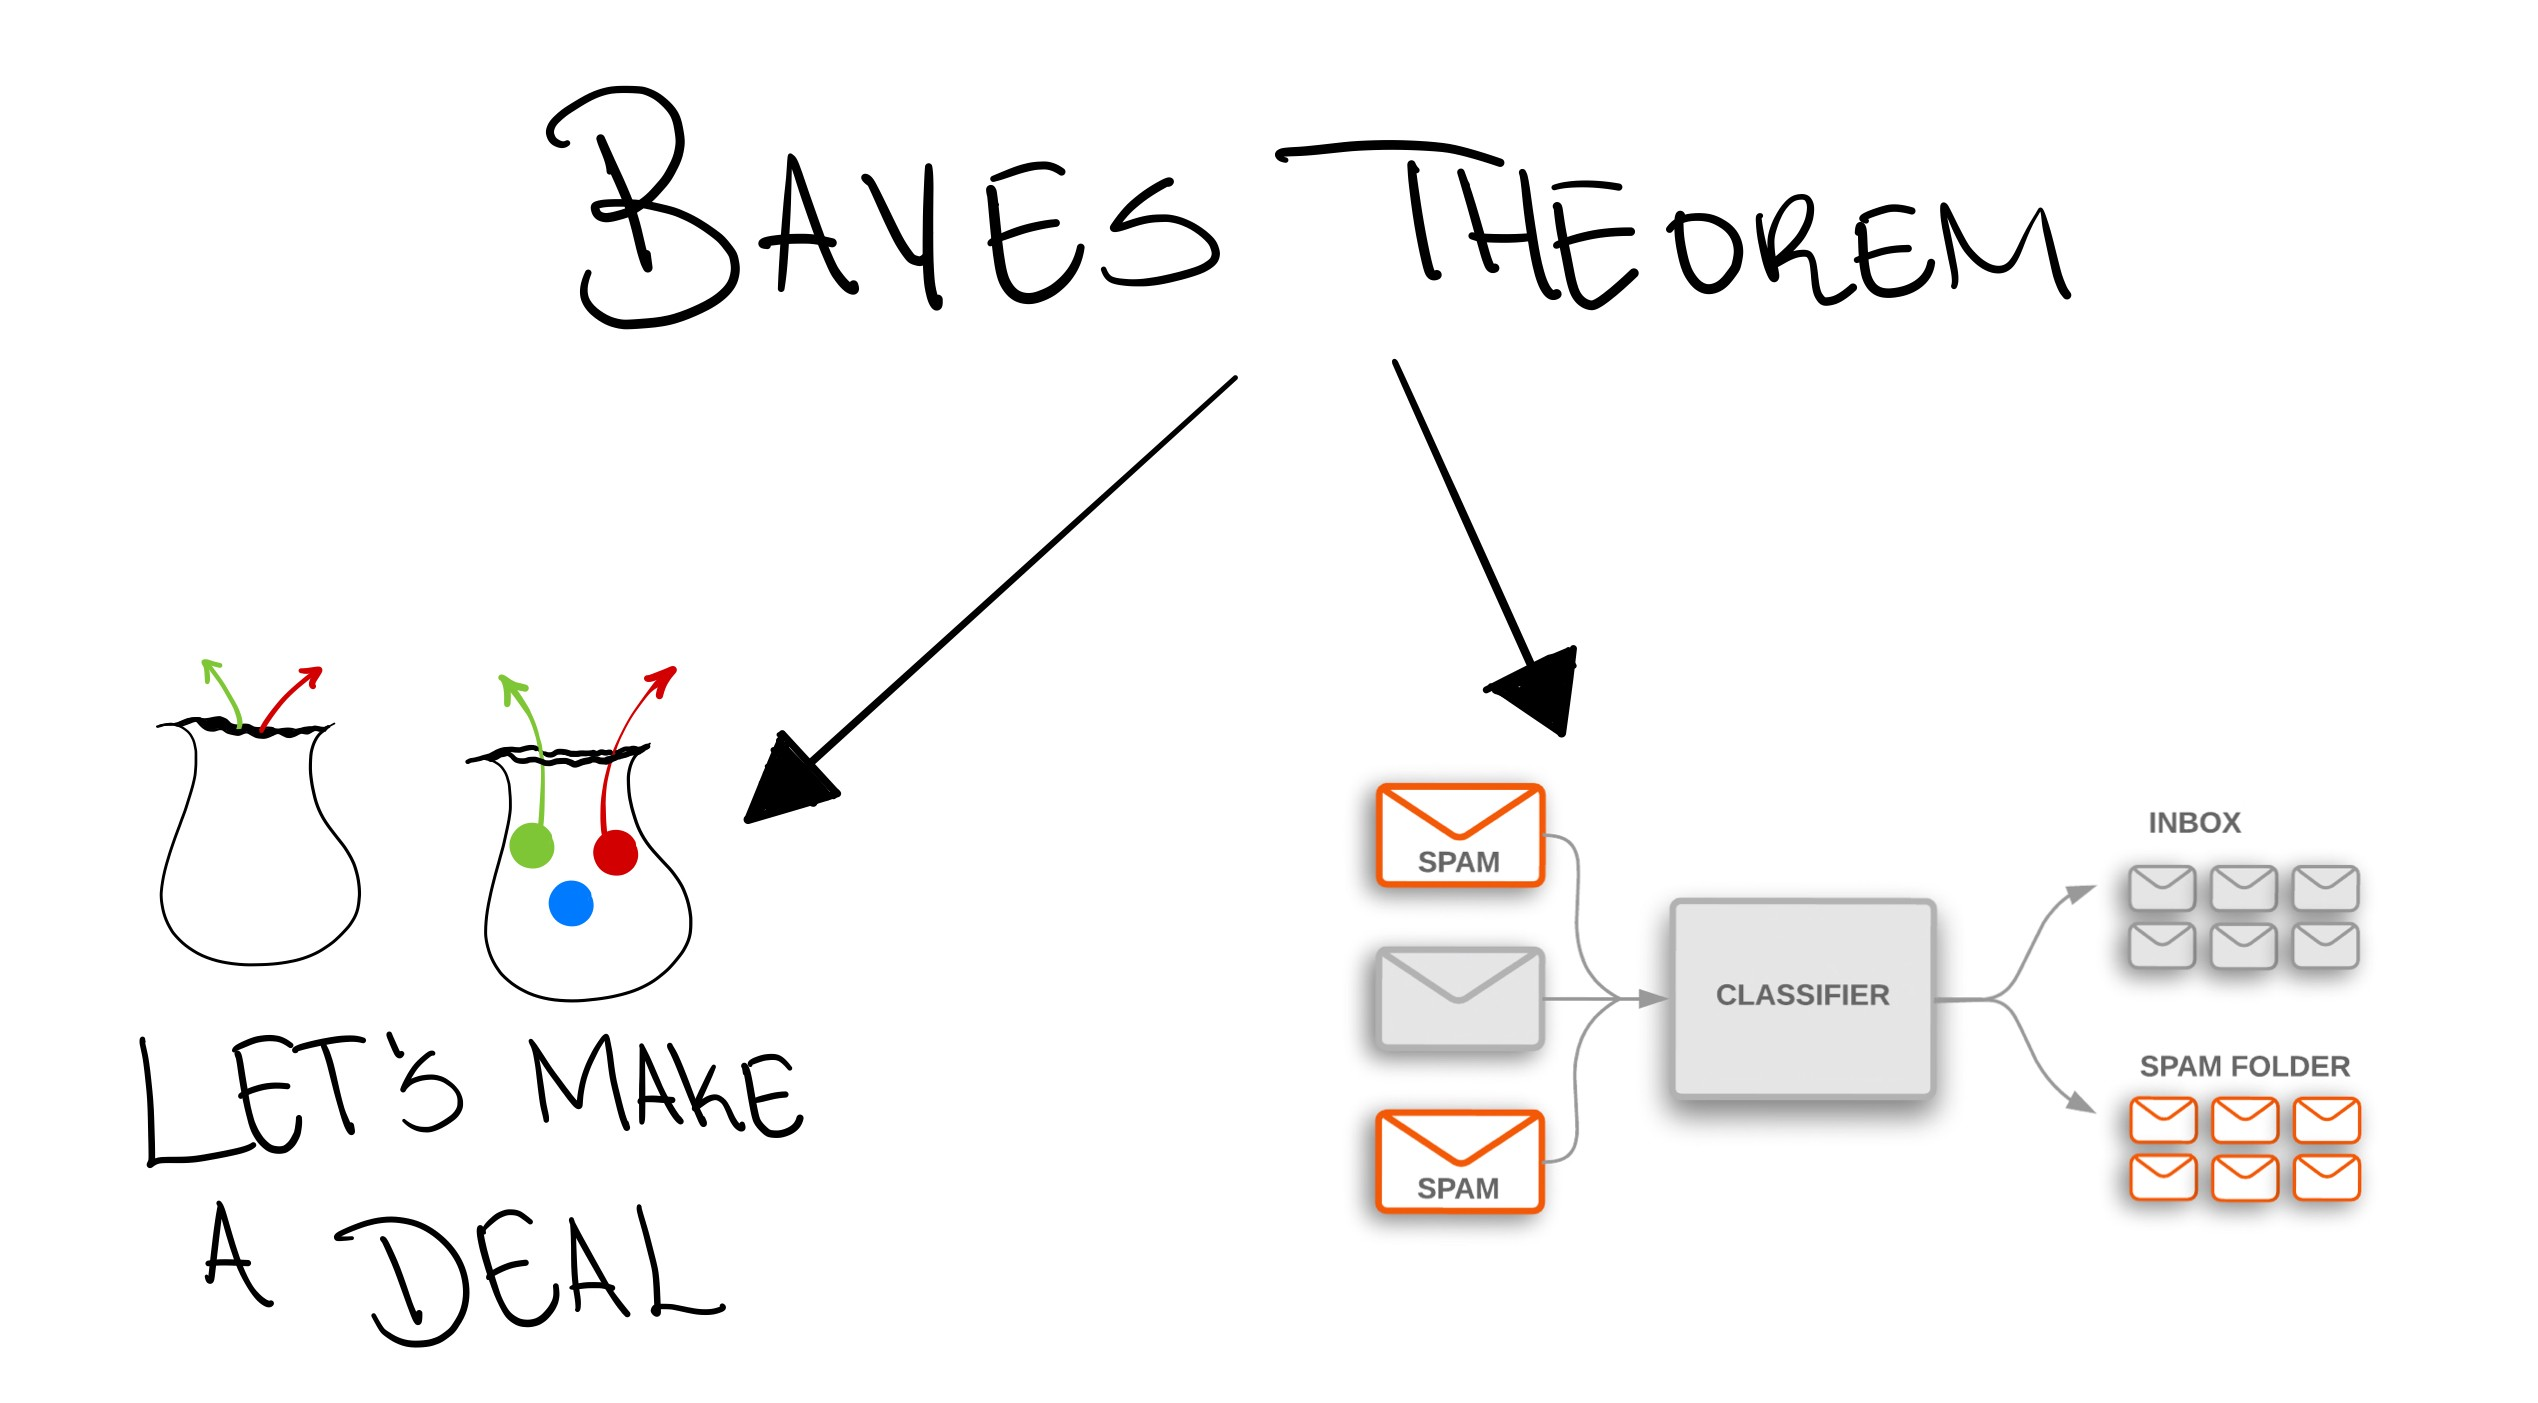

# Introduction

<br>

The Multinomial Naive Bayes is a supervised learning algorithm based on Bayes theorem. We use it in the context of text classification, and for this reason the first thing to do is create a **vocabulary**. <br>
The **vocabulary** will be composed by each word that appears at least one time in the training set, and it will be fundamental in this method.

<br>

This means that before understand how a Multinomial Naive Bayes works we must be able to pre process our data in order to obtain a bag of single words from a sentence.

![title](wordcloud150.png) 

## Data pre processing

In [1]:
# Install supplementary packages

#install.packages("stopwords")
#install.packages('e1071', dependencies=TRUE) # used for confusion matrix
#install.packages('psych')


library(dplyr)
library(tidyverse)
library(stopwords)
library(psych)
library(caret)        # used for confusion matrix


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.3     ✔ readr   1.3.1
✔ tibble  3.1.2     ✔ purrr   0.3.2
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ ggplot2 3.3.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In order to obtain a bag of single words from each sentence we manage the texts in this way:

- we remove any number and special character from the texts;
- we format all in lowercase;
- we split into vectors of single words;
- we clean from the empty words;
- we (eventually) remove the english stopwords (we tested the performances with and without the stopwords).

The stopwords are the most common words in a language, there is no single universal list of stop words used by all natural language processing tools. We use the list provided by $\textit{'stopwords'}$ R library (https://www.rdocumentation.org/packages/stopwords/versions/2.2).

In the next few codeblocks we illustrate each pre process step over the sentence: $ 'Under \ President \ George \ W. \ Bush, \ we \ added \ \$ 4.9 \ trillion\ to  \ the \ debt.' $ <br>
and later we incorporated all in a single function called $\textit{'pre_process'}$.

### Removing all digits

In [2]:
sample.phrase <- 'Under President George W. Bush, we added $4.9 trillion to the debt.'
cat('==Before:\n',sample.phrase,'\n\n')

sample.nodigits <- gsub("\\d+", "", sample.phrase)
cat('==After:\n',sample.nodigits,'\n')

==Before:
 Under President George W. Bush, we added $4.9 trillion to the debt. 

==After:
 Under President George W. Bush, we added $. trillion to the debt. 


### Removing all special characters and spaces

In [3]:
cat('==Before:\n',sample.nodigits,'\n\n')

sample.nospecial <- gsub("[^[:alnum:]]"," ",sample.nodigits)
cat('==After:\n',sample.nospecial,'\n')

==Before:
 Under President George W. Bush, we added $. trillion to the debt. 

==After:
 Under President George W  Bush  we added    trillion to the debt  


### Setting all letters to lowercase

In [4]:
cat('==Before:\n',sample.nospecial,'\n\n')

sample.lowercase <- tolower(sample.nospecial)
cat('==After:\n',sample.lowercase,'\n')

==Before:
 Under President George W  Bush  we added    trillion to the debt  

==After:
 under president george w  bush  we added    trillion to the debt  


### Splitting into words

In [5]:
cat('==Before:\n',sample.lowercase,'\n\n')

sample.words <- unlist(strsplit(sample.lowercase," "))
cat('==After:\n')
for (i in 1:length(sample.words)){
    cat(sample.words[i], " / ")
}

==Before:
 under president george w  bush  we added    trillion to the debt  

==After:
under  / president  / george  / w  /   / bush  /   / we  / added  /   /   /   / trillion  / to  / the  / debt  / 

### Deleting empty words

In [6]:
cat('==Before:\n')
for (i in 1:length(sample.words)){
    cat(sample.words[i], " / ")
}
cat('\n')

cat('==After:\n')
sample.noempty <- sample.words[sample.words!=""]
for (i in 1:length(sample.noempty)){
    cat(sample.noempty[i], " / ")
}

==Before:
under  / president  / george  / w  /   / bush  /   / we  / added  /   /   /   / trillion  / to  / the  / debt  / 
==After:
under  / president  / george  / w  / bush  / we  / added  / trillion  / to  / the  / debt  / 

### Removing single characters

In [7]:
# 'letters' is a vector of characters with all the letters of the alphabet
letters

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

In [8]:
cat('==Before:\n', sample.noempty, '\n')
cat('\n')
sample.nosc <- sample.noempty[!(sample.noempty %in% letters)]
cat('==After:\n', sample.nosc, '\n')

==Before:
 under president george w bush we added trillion to the debt 

==After:
 under president george bush we added trillion to the debt 


### Eventually removing stopwords

In [9]:
cat('Some stopwords of the english dictionary:\n')
print(stopwords('en')[1:15])
cat('\n')
cat('==Before:\n', sample.nosc, '\n')
cat('\n')
sample.nosw <- sample.nosc[!(sample.nosc %in% stopwords('en'))]
cat('==After:\n', sample.nosw, '\n')

Some stopwords of the english dictionary:
 [1] "i"          "me"         "my"         "myself"     "we"        
 [6] "our"        "ours"       "ourselves"  "you"        "your"      
[11] "yours"      "yourself"   "yourselves" "he"         "him"       

==Before:
 under president george bush we added trillion to the debt 

==After:
 president george bush added trillion debt 


### Functions that performs data processing and creates vocabulary

In [10]:
# function that removes stopwords

rm_stopwords <- function(text, stopw = stopwords('en')){
    return(text[!(text %in% stopw)])
}



# function that processes the text

pre_process <- function(column, voc = FALSE, rm_sw = FALSE)
    {
    s <- column %>%
        # remove digits
        gsub("\\d+","",.) %>%
        # remove special characters
        gsub("[^[:alnum:]]"," ",.) %>%
        # lowercase
        tolower() %>%
        # split into bag of words
        strsplit(" ") %>%
        # vector format
        unlist()
    
    # deleting remaining "" form previous steps  
    s <- s[s!=""]
    
    # removing single characters
    s <- s[!s %in% letters]
          
    # creating vocabulary
    if(voc)
       {
        if(rm_sw){
            return(rm_stopwords(unique(s)))
        }
        return( unique(s) )
       }
    
    # just splitting sentence in words
    if(rm_sw){ # removing stopwords
        return( rm_stopwords(s))
    }
    
    return( s )
               
}

In [11]:
pre_process('Under President George W. Bush, we added $4.9 trillion to the debt.', rm=TRUE)

[1] "president" "george"    "bush"      "added"     "trillion"  "debt"

## Multinomial Naive Bayes

Now that we know how to handle our dataset we can exploit how a Naive Bayes works. 


As said in the introduction, Naive Bayes are a probabilistic classifiers based on applying Bayes' theorem. <br> In a *Multinomial Naive Bayes* the assumption is that our samples have been generated by a multinomial distribution $(p_1, \ ... \ , p_L)$ . 
<br> 

The idea is that these probabilities are words frequencies. 
<br> 

This means that each sentence of "label 1", for example, is seen as words extracted in a independent way by the "label 1 pdf" over **vocabulary** words. 
<br>

What we want to do is reconstructs these pdfs from the data and use them to make a classification.


In fact the first thing to do is to build the **vocabulary** used to identify the words in the text. <br>
The vocabulary contains each word that appears at least one time in the *training set* after the pre process procedure, telling us which words we know.

<br>


In order to understand better how it works, we can define the following two propositions:
- Li = the label associated to our sentence is i-th label
- w = we find word w in the sentence

Than the Bayes' Theorem becomes: $$(1) \ \ \ P(Li|w) = \frac{P(w|Li) \cdot P(Li)}{P(w)} $$


If we now consider a whole sentence on N words $\{ w_{i}\}_{1 \; ... \; N}$    we obtain an iterative procedure to compute the **posterior**, analogous to the one obtained $\textit{6 Boxes sampling experiment}$. Here $I$ express our background information that changes at every word we read:

$$(2) \ \ \ P(Li|I_{j}) = \frac{P(w_{j}|Li,I_{j-1}) \cdot P(Li|I_{j-1})}{P(w_{j})} $$
where  $ P(Li|I_{0}) = P(Li) $ is the **prior** for label i.

<br>
<br>

The result of these calculations can be expressed in this way:


$$(3) \ \ \ P(Label \ i|Sentence) = \frac{P(Sentence|Label \ i) \cdot P(Label \ i)}{P(Sentence)} $$

where:

<br>

<br>

- $$(4) \ \ \ P(Label \ i) = \frac{ \# \ Label \ i}{ Trainig \ set \ size } \ \ \ \ \  is \ the  \ \textbf{prior} \ for \ label \ i  $$ 

computed from the knowledge that we have thanks to the training set. <br>
An other choice is to use uniform prior: each label has same probability. What we expect is that with a big amount of data (a text or a long sentence) the prior choice will not be important.

<br>
<br>


- $$(5) \ \ \ P(Sentence|Label \ i) = \prod_{j=0}^{N}P(w_{j}|Label \ i) \ \ \ \ \  is \ the  \ \textbf{likelihood} \ for \ label \ i  $$   

computed from the likelihoods of single words. 

<br>
These likelihoods are computed for each word $w_{j}$ that is present in the vocabulary , using the training test and relation that follows: 
<br> 

$$(6) \ \ \ P(w_{j}|Label \ i) = \frac{ 1+\# \ w_{j} \ in \ sentences \ with \ label \ i}{\# \ of \ all \ w \ in \ sentences \ with \ label \ i} $$


Adding 1 to the counts of word $w_{j}$ is a procedure called **Laplace smoothing** and it used to avoid having any likelihood equals to 0.

<br>
<br>

- $$(7) \ \ \ P(Sentence) = \prod_{j=0}^{N}P(w_{j}) \ \ \ \ \  is \ the  \ \textbf{evidence} \ for \ the \ considered \ sentence  $$ 

computed using the training set starting from the single word **evidence** :


$$(8) \ \ \ P(w_{j}) = \frac{ \# \ w_{j} \ in \ training \ set}{\# \ of \ all \ w \ in \ training \ set} $$

<br>
<br>

Thanks to these elements we can evaluate the $\textbf{posterior:}$

<br>

- $$(9) \ \ \ P(Label \ i|Sentence) \ \ \ \ \   is \ the  \ \textbf{posterior} \ obtained  \ for \ label \ i $$

<br>

But  what if the word w_{j} does not appear in the **vocabulary** ? <br> Since the **vocabulary** is made from the training set, we are not sure that it will contain all the words that are present in the test set! <br>

In this case, since the new word adds no information, we simply $do \ not \ update \ \textbf{posteriors} \$

<br>

Looking at how likelihoods are computed we can easily see why this method is called "naive": <br>
there is no assuption of relation between different words, which is an extremely strong assumption by itself since we are working with texts and sentences, and words in a language are all but independent from each others.


<br>
<br>
<br>


At this point, given a sentence the **classification** is performed labeling it with the label that has greater posterior value.
<br>

For example if sentence **s** has following posteriors:
- $P(L1|s) = 0.14$
- $P(L2|s) = 0.41$
- $P(L3|s) = 0.45$

The label 3 will be associated to **s**.

### Function that computes histogram of frequencies

In [12]:
# Histogram plot function

histo_plot <- function(hist,range,vocabulary)
    {
    ord <- order(hist, decreasing=TRUE)
    options(repr.plot.width=6, repr.plot.height=4)
    par(mar=c(8,4,2,1))
    
    barplot(hist[ord][range], ylab = "likelihood",names=vocabulary[ord][range],las=2, col='forestgreen')
    print(vocabulary[ord][range])
}



# Useful function that filters the dataset

filter <- function(data,label,lname,tname)
    {
    
    if(label=="all")
        {
        return(data[[tname]])
        }
    
    filtered_data <- data[data[[lname]]==label,]
    return( filtered_data[[tname]] )
}               



# Function that given the training set or a sentence creates histogram: words frequency.
# These histograms are discrete pdf.

histo <- function(data,label,vocabulary, lname, tname, rm=FALSE)
    {
    s = vector()
    
    # pre processing
    if(label=="all")
        {
        s = pre_process( data[[tname]], rm_sw=rm)
    }
    else {
        s = pre_process( filter(data,label,lname,tname), rm_sw=rm)
    }
    
    # counting words that appears in vocabulary
    t <- table(s)  # return an array of named integers
    
    counts <- as.integer( t[vocabulary] )
    counts[is.na(counts)] = 0
    
    # Laplace smoothing
    counts = counts+1
    
    # return probability distribution
    return(counts/length(s))
}

### Functions that compute priors and likelihoods


Given a label the function *histo()* will evaluate the **likelihood** for all words conditioned to that label. <br>
If label = "all" it computes the **evidence** for each word

In [13]:
make_priors <- function(data, lname){
    
    p <- table(data[[lname]])
    v <- p/nrow(data)
    
    return( v )
}


# We use histo() function over each label and than we put them together in a matrix. 
# In this way we have one column for each word, and there are n.classes rows 

make_likelihoods <- function(data, vocabulary,n.classes,lname,tname,rm_sw=FALSE){
    
    H <- histo(data, 0, vocabulary, lname,tname,rm_sw)
    for(i in 1:(n.classes-1)){
        H <- rbind( H, histo(data, i, vocabulary, lname,tname, rm_sw) )
    }
    
    return( H )
}

### Function that computes posterior for a single sentence

In [14]:
naive.bayes <- function(sentence, evidence, likelihoods, priors, vocabulary, n.classes, memory=FALSE) {
    words <- pre_process(sentence)
    posteriors <- priors
    
    # vector that contains updating posteriors while reading words 
    each_step_posteriors <- vector()
        
    # finding words indexes w.r.t. dictionary. If a word is not found which() gives a integer(0),
    # that can be found checking it length.
    indexes <- lapply(words, function(x){  which(vocabulary == x) })
    
    # loop over the words. length(index) should be 1 if the word is present in the vocabulary, 0 otherwise
    for (index in indexes) { 
        
        # known word, if unknown word, posterior is not updated
        if ( length(index) ) {
            posteriors <- (likelihoods[, index]*posteriors)/evidence[index] 
            }
        
        if(memory)  { 
            each_step_posteriors <- c(each_step_posteriors, posteriors) 
            }
    }
    
    if(memory) {
        # reshaping to a matrix
        dim( each_step_posteriors ) <- c(n.classes,length(words)) 
        each_step_posteriors <- t(each_step_posteriors)
        
        # normalizing by row 
        p <- each_step_posteriors / rowSums(each_step_posteriors)  
        
        # adding first row: priors
        # returning matrix with "all steps posteriors"
        return( rbind(priors,p) )
        }
    
    return(posteriors/sum(posteriors))
}

### Function that performs classification

In [15]:
# truth.table is the interpretation of our datasets labels and is a vector of strings, 
# for example truth.table <- c('True', 'False')

classifier <- function(scores, truth.table, verbose=FALSE) {
    # ordering labels w.r.t. their score = posterior value
    labels <- order(scores, decreasing=TRUE)
    
    if (verbose) {
        results <- scores[labels]*100
        
        L = length(labels)
        for(i in 1:L){
            cat("Label", labels[i]-1," : ",results[i],"%","(", truth.table[labels[i]],") \n")
        }
    }
    
    return(labels[1]-1)
}

### Function that evaluates performance over the test set

In [16]:
# function that classify test sentences

test.evaluation <- function(test, evidence, likelihoods, priors, vocabulary, n.classes, lname, tname, rm=FALSE)
    {
    
    L = nrow(test)  
    predictions <- vector(length=L) 
    errors <- 0
    
    for (i in 1:L) 
        {
        scores <- naive.bayes(pre_process(test[[tname]][i], rm_sw = rm), 
                              evidence, likelihoods, priors, vocabulary, n.classes)
        pred.label <- classifier(scores)
        
        predictions[i] <- pred.label
        
            if(pred.label!=test[[lname]][i])
            {
            errors <- errors + 1
            }
        }
    
    score = 1-errors/L
    df <- list(score, predictions)
    
    names(df) <- c("score", "predictions")
    
    return(df)
    }

# Binary classification

The first chosen dataset is taken from the kaggle website (https://www.kaggle.com/saratchendra/fake-news). It is composed by 20387 samples that are written text from social media, all classified with two different labels:

    0 = True news
    1 = Fake news

The columns of the dataset are:
- $\textbf{id:}$ an integer number unique for every row
- $\textbf{title:}$ the title of the text
- $\textbf{author:}$ who have written the text
- $\textbf{text:}$ a vector of character containing one or more sentences
- $\textbf{label:}$ an integer (0 or 1) which classify the sample as described before

The number of samples in this dataset is big and if we use it entarly the computational time is too high. For this reason, we have decided to take only a samll part of it (1000 samples) sampling randomly both the train (700 samples) and the test sets (300 samples).

## Load and inspect the dataset

In [17]:
# truth table of our dataset
truth.table_2 <- c('True', 'False')

# loading the dataset
file.train_2 <- 'fake_train.csv'
lname_2 <- 'label' # name of the labels column
tname_2 <- 'text'

dataset_2 <- read_csv(file.train_2)

# remove entries with missing values
counterNA_2 <- apply(apply(dataset_2, 2, is.na), 2, sum)
cat('Missing values:')
counterNA_2
dataset_2 <- dataset_2[complete.cases(dataset_2),]

Parsed with column specification:
cols(
  id = col_double(),
  title = col_character(),
  author = col_character(),
  text = col_character(),
  label = col_double()
)


Missing values:

id  title author   text  label 
     0    558      0    115      0

In [18]:
# splitting in training and test sets

N_data_2 = 1000
N_train_2 <- ceiling(0.70*N_data_2); 
N_test_2 <- N_data_2-N_train_2

# choose if to sample randomly or simply take first N_train entries as training
rsmpl <- FALSE
if (rsmpl){
    set.seed(101325)
    sample.rows <- sample(dataset_2$id, N_test_2, replace=F) 
    train_2 <- dataset_2[sample.rows[1:N_train_2],]
    test_2  <- dataset_2[sample.rows[N_train_2:N_test_2],]
}else{
    train_2 <- dataset_2[1:N_train_2 ,]
    test_2  <- dataset_2[N_train_2:N_data_2,]
}


# quick check of the labels
n.classes_2 <- length(names(table(dataset_2[[lname_2]])))

cat('The dataset consists of', nrow(dataset_2), 'documents, belonging to', n.classes_2,
    'different classes.\nIn the training set:', N_train_2,
    'documents.\nIn the test set:', N_data_2-N_train_2, 'documents.\n')

The dataset consists of 20127 documents, belonging to 2 different classes.
In the training set: 700 documents.
In the test set: 300 documents.


In [19]:
head(train_2, n=1)

id,title,author,text,label


In [20]:
head(test_2, n=1)

id,title,author,text,label
722,FLYNN: Critics Call Nuclear Scientist Miss USA ’Dumb’ After She Disses Feminism and Calls Health Care a ’Privilege’ - Breitbart,Daniel J. Flynn,"Kara McCullough made the Miss USA pageant great again — just not in the way the contest’s organizers intended. [Twenty months after Donald Trump sold the contest to the pageant made every effort to separate itself from its former owner — a move not lost on the media covering the event. The Associated Press, for instance, reported: “The pageant included a field of five new immigrants who spoke on air about the importance of diversity — as if to refute US President Donald Trump’s less than welcoming stand toward some immigrants and refugees. ” McCullough, an born in Italy, looked the part but refused to play it this weekend. Miss D. C. rejected feminism for equality. “So as a woman scientist in the government, I’d like to lately transpose the word ‘feminism’ to ‘equalism,’” she explained. “I don’t really want to consider myself — try not to consider myself like this you know, like, ‘Oh, I don’t really care about men.’ But one thing I’m going to say, though, is women, we are just as equal as men when it comes to opportunity in the workplace. ” She further ran afoul of the politically correct when she described health care as an earned “privilege” rather than an awarded “right. ” She told her questioners, “I’m definitely going to say it’s a privilege. As a government employee, I am granted health care. And I see firsthand that for one to have health care, you need to have jobs. ” She won the judges but lost the judgmental. Calling the Miss USA’s answers “dumb” and “ill informed,” the appropriately named Linda Stasi of the New York Daily News charged that “McCullough did all women a disservice with her remarks on healthcare, but she did more damage with her dismissal of feminism. ” Other cultural commissars carped. It’s incredibly sad that in 2017, a woman is striving to occupy a position of influence no understanding of what feminism is. #MissUSA, — courtney (@seecourttweet) May 15, 2017, Dear #kara mccullough You are sadly mistaken. Everyone has a right to healthcare. Maybe you should be stripped of yours. The ACA helps many! — Kizzy (@TrulyKizzo) May 15, 2017, Happy to see a woman of color crowned Miss USA two years in a row, but Kara McCullough has some problematic views on healthcare and feminism, — mama cass (@_femalien) May 15, 2017, It’s a beauty pageant. The job requirements don’t call for a nuclear scientist. But it helps that Miss USA works a nuclear scientist.",0


## Vocabulary bulding

First of all we have to build the vocabulary that we will use to identify the words in the text. To do this we exploit our training set.


We have decided to create two different vocabulary, one with the stopwords and another without them. In this way we can test the impact of this preprocess technique and we can see if the performances are better removing these words.

In [21]:
# build vocabularies
vocabulary_2 <- pre_process(train_2[[tname_2]], voc=TRUE)
vocabulary_sw_2 <- rm_stopwords(vocabulary_2)

In [22]:
cat('==Vocabulary with stopwords:\nLength:', length(vocabulary_2),'\nFirst 10 words:\n')
print(vocabulary_2[1:10])
cat('\n')

cat('==Vocabulary without stopwords:\nLength:', length(vocabulary_sw_2),'\nFirst 10 words:\n')
print(vocabulary_sw_2[1:10])

==Vocabulary with stopwords:
Length: 33644 
First 10 words:
 [1] "house"  "dem"    "aide"   "we"     "didn"   "even"   "see"    "comey" 
 [9] "letter" "until" 

==Vocabulary without stopwords:
Length: 33521 
First 10 words:
 [1] "house"    "dem"      "aide"     "didn"     "even"     "see"     
 [7] "comey"    "letter"   "jason"    "chaffetz"


## Prior, likelihood and evidence computation

In this section **priors**, **likelihoods** and **evidences** are computed following the procedure describet before.

In [23]:
priors_2 <- make_priors(train_2, lname_2)

# with stopwords
evidence_2 <- histo(train_2,"all",vocabulary_2,lname_2,tname_2)
likelihoods_2 <- make_likelihoods(train_2, vocabulary_2, n.classes_2, lname_2, tname_2)

# without stopwords
evidence_sw_2 <- histo(train_2,"all",vocabulary_sw_2,lname_2,tname_2,rm = TRUE)
likelihoods_sw_2 <- make_likelihoods(train_2, vocabulary_sw_2, n.classes_2, lname_2, tname_2, rm_sw = TRUE)

Lets have a look at words with higher probability, conditioned to label 1 and using two different vocabularies: <br>
one with stop words and the other without.

==== Histogram for label 1 ==== 

 [1] "the"  "to"   "of"   "and"  "in"   "that" "is"   "for"  "it"   "on"  


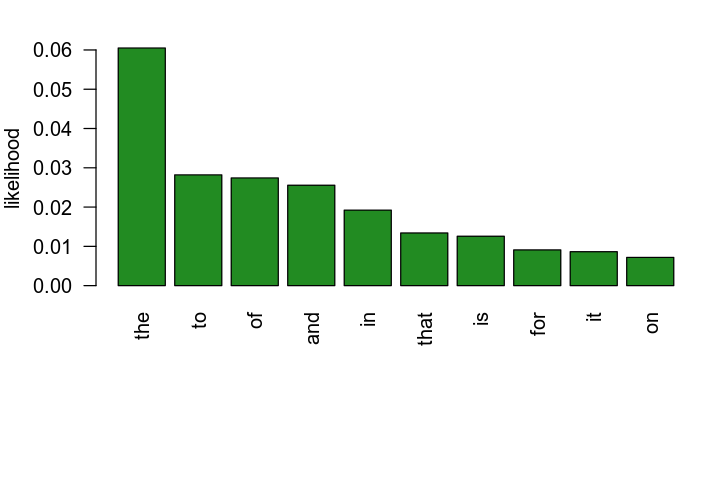

In [24]:
cat("==== Histogram for label 1 ==== \n\n")
histo1 <- histo(train_2, 1, vocabulary_2,lname_2,tname_2)
histo_plot(histo1,1:10,vocabulary_2)

==== Histogram for label 1 ==== 

 [1] "trump"   "clinton" "one"     "people"  "us"      "can"     "hillary"
 [8] "de"      "state"   "said"   


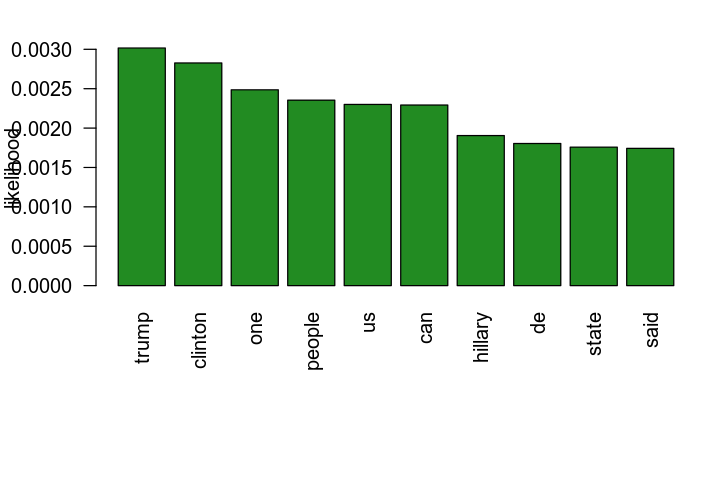

In [25]:
cat("==== Histogram for label 1 ==== \n\n")
histo1 <- histo(train_2, 1, vocabulary_sw_2,lname_2,tname_2)
histo_plot(histo1,1:10,vocabulary_sw_2)

## Posterior and classification

Once we have computed **priors**, **likelihoods** and **evidences** we simply have to use Bayes theorem as shown before. Given a sentence, the **posteriors** for each label is computed by the $\textit{naive.bayes()}$ function.


Given a sentence **classification** is performed labeling it with the label that has greater posterior value, as explained before, and using $classifier()$ function.
<br>

In [26]:
score_2 <- naive.bayes('scientists finally tell the truth: vaccine is bad for us, and earth is flat',
                     evidence_2,likelihoods_2,priors_2,vocabulary_2,n.classes_2)
ppp_2 <- classifier(score_2,truth.table=truth.table_2, TRUE)
cat('\nThe label of this sentence is:', ppp_2[[1]])

Label 1  :  99.76044 % ( False ) 
Label 0  :  0.2395614 % ( True ) 

The label of this sentence is: 1

From this single simple sentence, we can already say that the algorithm we implemented works and successfully finds the true label. There is no doubt that this instance is false and it is confirmed by the high probability associeted to the output.

### Posteriors updating

Lets have a visual representation of posteriors updating for a given sentence and using **priors**, **likelihoods** and **evidences** computed from the considered 2 lables dataset.

In [27]:
# function that provides plot of updating posterior

each_step_posteriors_plot <- function(each_step_posteriors,truth.table,n.classes)
    {
    x = 1:length(each_step_posteriors[,1])
    
    options(repr.plot.width=16, repr.plot.height=12)
    #options(repr.plot.width=16, repr.plot.height=10)
    par(mfrow=c(2,n.classes/2), cex=1.5) 
    
    for (i in 1:n.classes){
        plot(x,each_step_posteriors[,i], ylim = c(0,1), pch = 2, 
             col='navy', main=paste('Label',i-1,':',truth.table[i]), xlab="", ylab="")
        grid()
        title(xlab ="Word number",ylab="Posterior",line=2, cex.lab=1.2, family="Calibri Light")
    }
    
    return(cat("\n"))
}

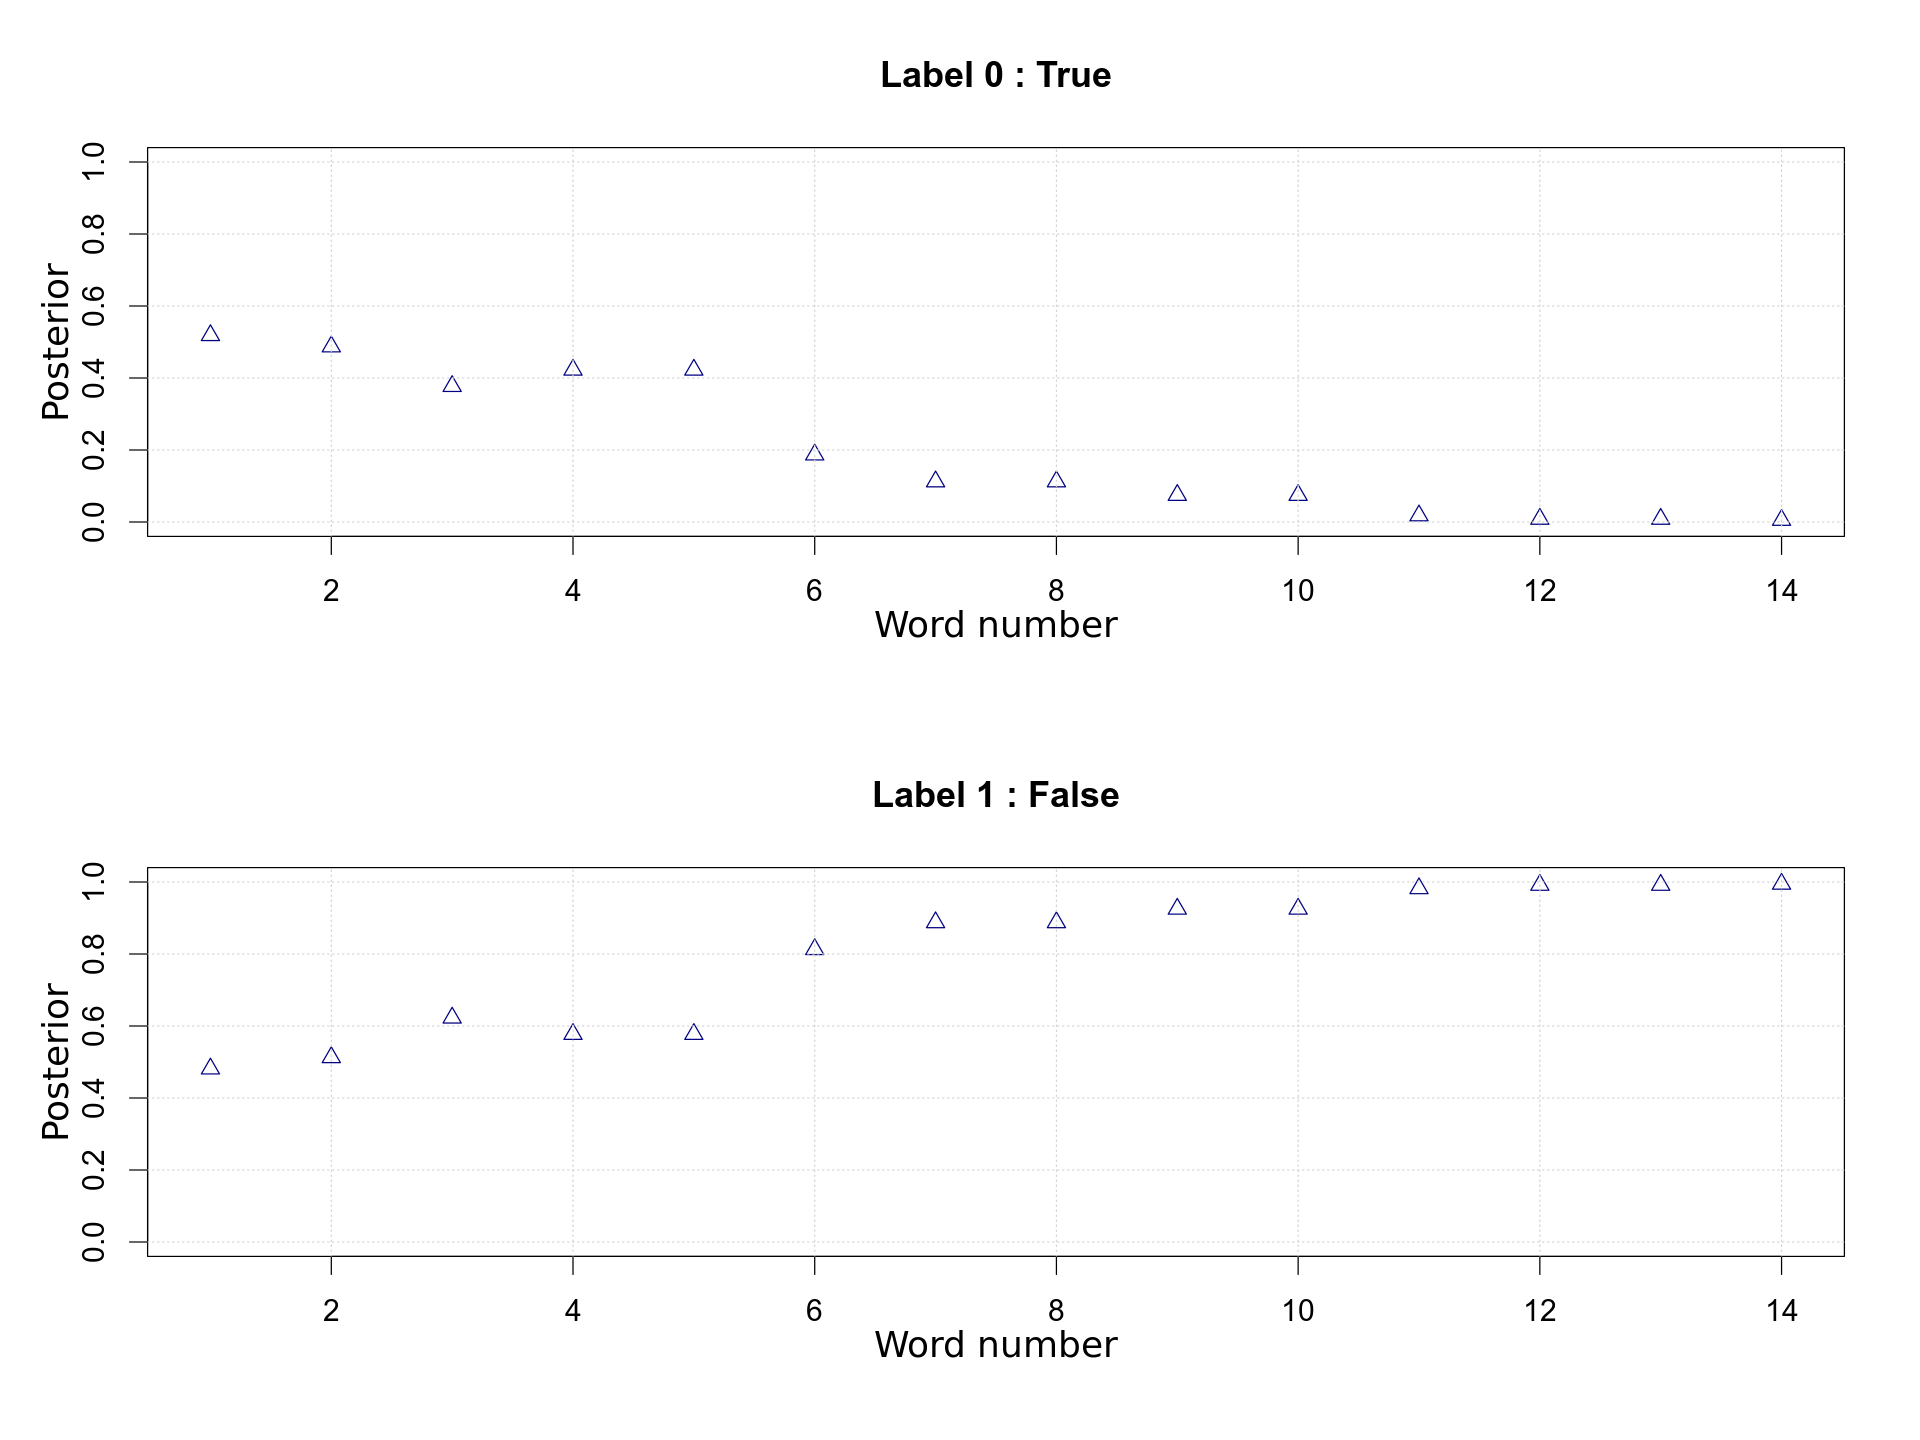

In [28]:
sentence <- 'scientists finally tell the truth: vaccine is bad for us, earth is flat'

posts <- naive.bayes(sentence,evidence_sw_2,likelihoods_sw_2,priors_2,vocabulary_sw_2,n.classes_2,memory=TRUE)
each_step_posteriors_plot(posts,truth.table_2,n.classes_2);

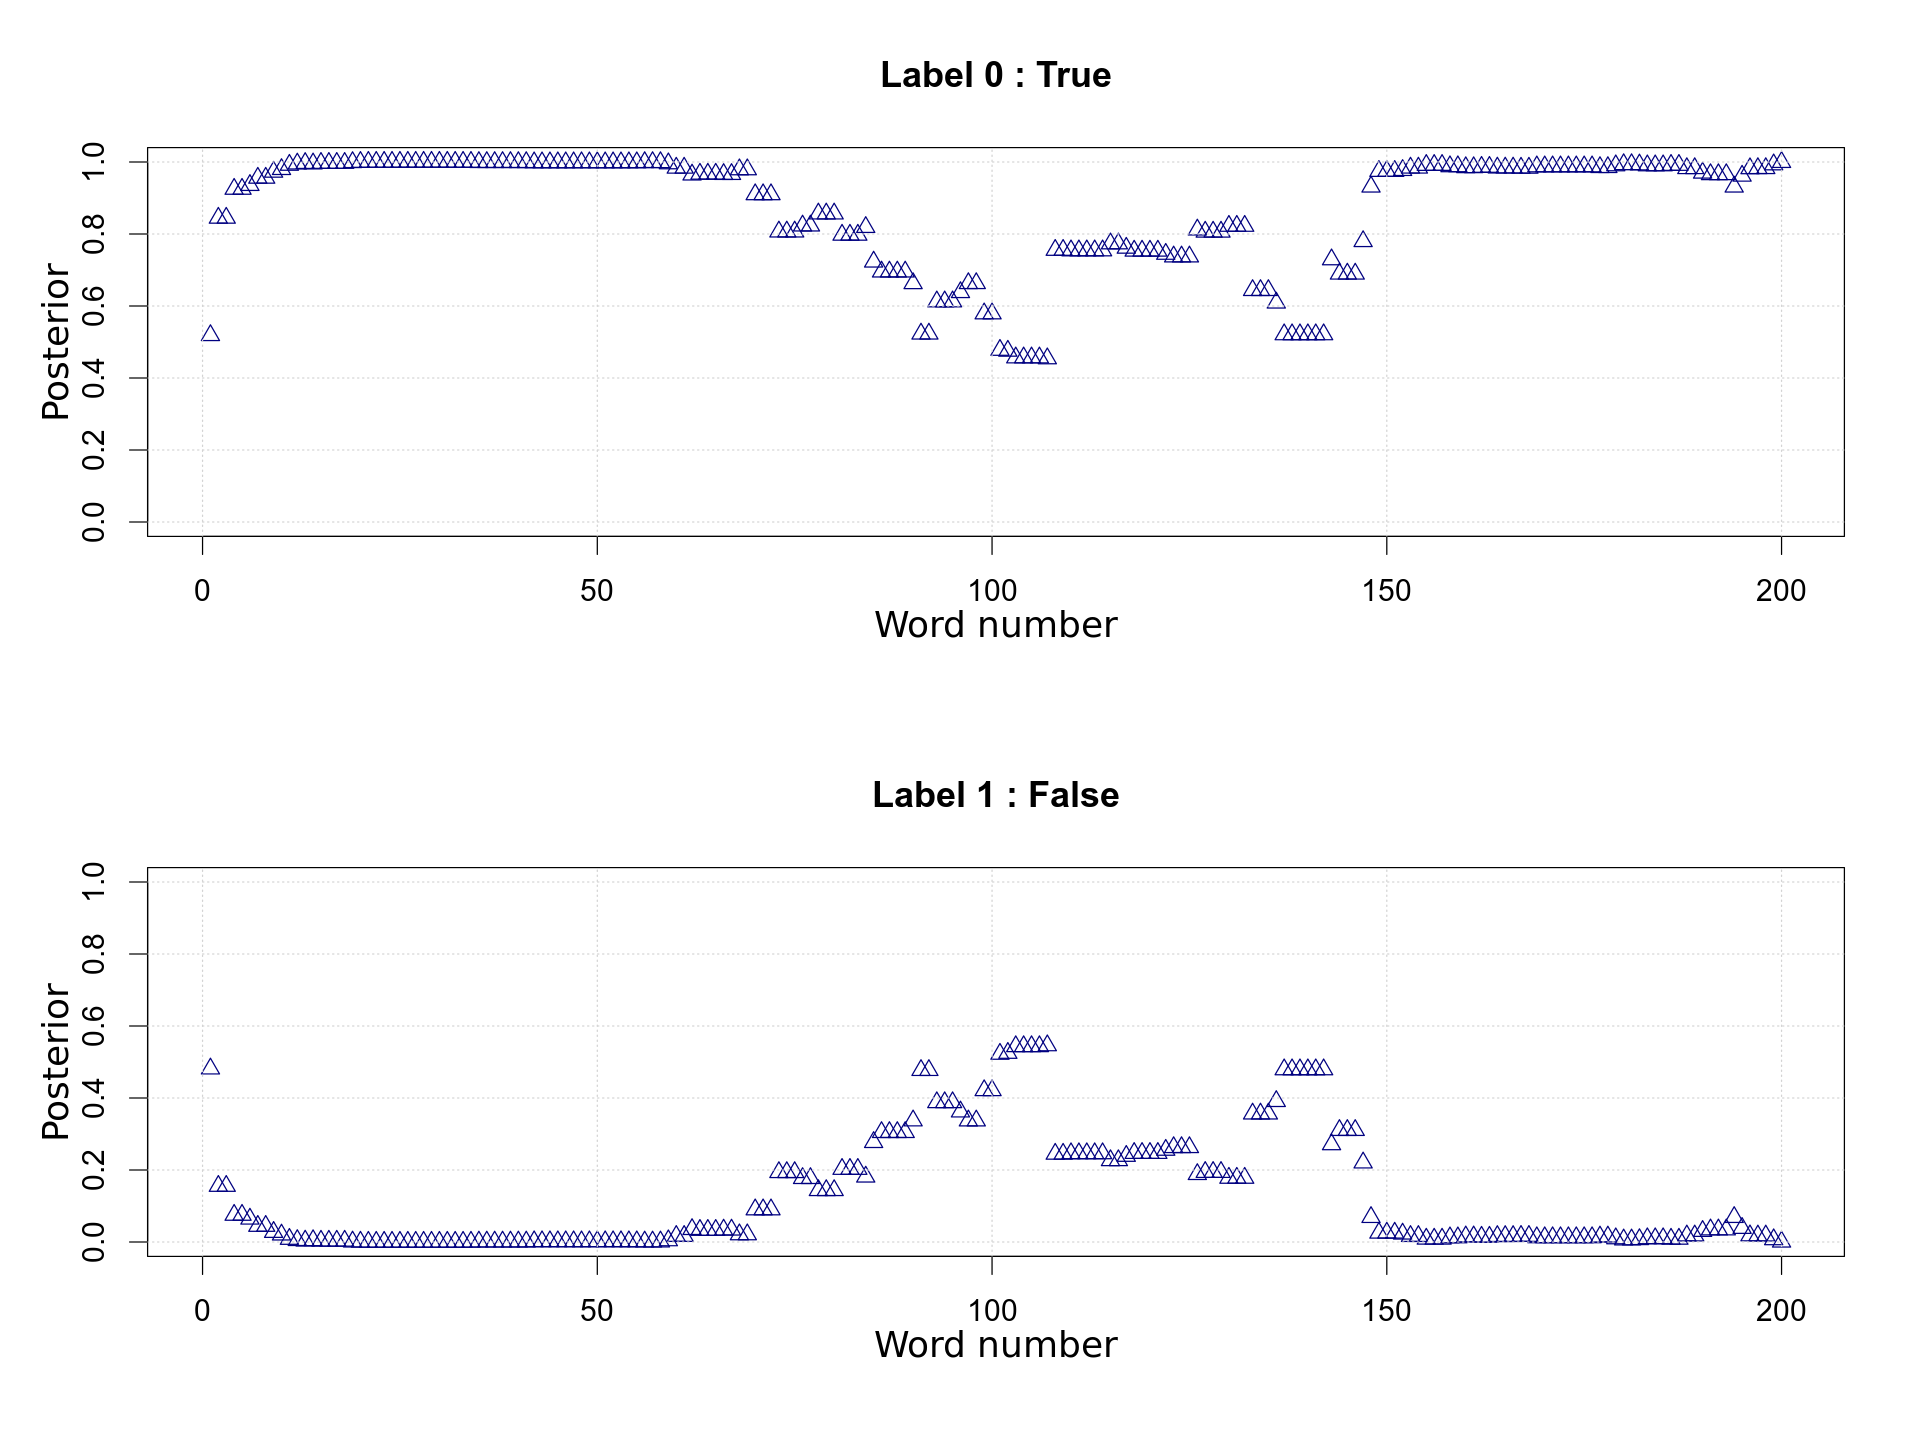

In [29]:
posts <- naive.bayes(train_2[[tname_2]][23],evidence_sw_2,likelihoods_sw_2,priors_2,vocabulary_sw_2,n.classes_2,memory=TRUE)
each_step_posteriors_plot(posts,truth.table_2,n.classes_2);

## Results

Finally, lets compute posteriors for each sentence in the test set and lets classify them following the procedure decribed previously.

In [30]:
cat(" ==== Results with priors learned by training set and with stopwords ==== \n")
df_2 <- test.evaluation(test_2, evidence_2, likelihoods_2, priors_2, vocabulary_2, n.classes_2, lname_2, tname_2)
cf_2 <- confusionMatrix( factor(df_2$predictions) , factor(test_2[[lname_2]]) )

cf_2$overall[1]
cat(" ==== Confusion matrix ==== \n")
cf_2$table 
cf_2$byClass[5]
cf_2$byClass[6]

 ==== Results with priors learned by training set and with stopwords ==== 


Accuracy 
0.8471761

 ==== Confusion matrix ==== 


          Reference
Prediction   0   1
         0 140  32
         1  14 115

Precision 
0.8139535

Recall 
0.9090909

In [31]:
cat(" ==== Results with uniform priors and with stopwords ==== \n")
df_2 <- test.evaluation(test_2, evidence_2, likelihoods_2, c(0.5,0.5), vocabulary_2, n.classes_2, lname_2, tname_2)
cf_2 <- confusionMatrix( factor(df_2$predictions) , factor(test_2[[lname_2]]) )

cf_2$overall[1]

 ==== Results with uniform priors and with stopwords ==== 


Accuracy 
0.8471761

In [32]:
cat(" ==== Results with priors learned by training set and without stopwords ==== \n")
df_2 <-test.evaluation(test_2, evidence_sw_2, likelihoods_sw_2, priors_2, vocabulary_sw_2, n.classes_2,
                       lname_2, tname_2, rm=TRUE)

cf_2 <- confusionMatrix( factor(df_2$predictions) , factor(test_2[[lname_2]]) )

cf_2$overall[1]
cat(" ==== Confusion matrix ==== \n")
cf_2$table 
cf_2$byClass[5]
cf_2$byClass[6]

 ==== Results with priors learned by training set and without stopwords ==== 


Accuracy 
0.8438538

 ==== Confusion matrix ==== 


          Reference
Prediction   0   1
         0 143  36
         1  11 111

Precision 
0.7988827

Recall 
0.9285714

The results using the test set are good: we can see that the algorithm can assign the right label with 0.84 of accuracy in both cases, with and without the stopwords. Hence, the first thing that we can say is that the performances do not improve if we remove the most common words from the texts. <br>
The second thing we see is that, as we imagined, priors choice is ininfluent.

Looking at the confusion matrix, we note that the naive bayes tends to assign with more frequence the label 0 (True) than the other one. Moreover, the precision is smaller than the recall and this fact underlines more difficulty in discriminating the false positive sentences than the false negative.

# 6 Classes Classification

In this section we apply the same algorithm to a dataset composed by 10223 samples with six different classes:

    0 = Barely-True
    1 = False
    2 = Half-True
    3 = Mostly-True
    4 = Not-Known
    5 = True

The classification with more than two classes is more difficult and it could lead to less accurate results.
The chosen dataset is taken from Kaggle (https://www.kaggle.com/anmolkumar/fake-news-content-detection?select=train.csv) and as the previous one it is composed of texts taken from different social media. We have split it into a training dataset of 8178 (80%) instances and a test set of 2044 (20%) instances.

The columns of this dataset are:
- $\textbf{Labels:}$ an integer value from 0 to 6 which indicates the class of the sentence
- $\textbf{Text:}$ a vector of character containing one or more sentences 
- $\textbf{Text_tag:}$ different types of content tags 

## Load and inspect the dataset

In [33]:
# truth table of our dataset
truth.table_6 <- c('Barely True', 'False', 'Half True', 'Mostly True', 'Unknown', 'True')

# loading the dataset
file.train_6 <- 'train.csv'
lname_6 <- 'Labels'
tname_6 <- 'Text'

dataset_6 <- read_csv(file.train_6)

# remove entries with missing values
counterNA_6 <- apply(apply(dataset_6, 2, is.na), 2, sum)
cat('Missing values:')
counterNA_6
dataset_6 <- dataset_6[complete.cases(dataset_6),]

Parsed with column specification:
cols(
  Labels = col_double(),
  Text = col_character(),
  Text_Tag = col_character()
)


Missing values:

Labels     Text Text_Tag 
       0        0        2

In [34]:
# splitting in training and test sets

N_train_6 <- ceiling(0.80*nrow(dataset_6)); N_test_6 <- nrow(dataset_6)-N_train_6

# choose if to sample randomly or simply take first N_train entries as training
rsmpl <- FALSE
if (rsmpl){
    set.seed(101325)
    sample.rows <- sample(dataset_6$id, N_test_6, replace=F) 
    train_6 <- dataset_6[sample.rows[1:N_train_6],]
    test_6  <- dataset_6[sample.rows[N_train_6:N_test_6],]
}else{
    train_6 <- dataset_6[1:N_train_6 ,]
    test_6  <- dataset_6[N_train_6:nrow(dataset_6),]
}


# quick check of the labels
n.classes_6 <- length(names(table(dataset_6[[lname_6]])))

cat('The dataset consists of', nrow(dataset_6), 'documents, belonging to', n.classes_6,
    'different classes.\nIn the training set:', N_train_6,
    'documents.\nIn the test set:', nrow(dataset_6)-N_train_6, 'documents.\n')

The dataset consists of 10238 documents, belonging to 6 different classes.
In the training set: 8191 documents.
In the test set: 2047 documents.


In [35]:
head(train_6)

Labels,Text,Text_Tag
1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
2,The economic turnaround started at the end of my term.,"economy,jobs"
5,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education


In [36]:
head(test_6)

Labels,Text,Text_Tag
5,The Bush tax cuts helped to create a substantial part of the deficit.,"bush-administration,deficit,taxes"
1,We have invested record funding in protecting our environment.,environment
3,$2.4 million of the NIH dollars was spent on origami condoms.,"ebola,public-health"
0,"Says Sen. Sherrod Brown voted to keep an extreme, job-killing Internal Revenue Service paperwork mandate.","jobs,taxes,voting-record"
3,Half of illegal immigrants come on legal visas and then overstay.,immigration
1,"Girl Scouts USAs curriculum promotes Margaret Sanger, founder of Planned Parenthood, Betty Friedan, founder of NARAL Prochoice, and other pro-abortion women as icons for our children to emulate.","abortion,children,sexuality"


## Vocabulary building

In [37]:
# build vocabularies
vocabulary_6 <- pre_process(train_6[[tname_6]],voc=TRUE)
vocabulary_sw_6 <- rm_stopwords(vocabulary_6)

In [38]:
cat('==Vocabulary with stopwords:\nLength:', length(vocabulary_6),'\nFirst 10 words:\n')
print(vocabulary_6[1:10])
cat('\n')
cat('==Vocabulary without stopwords:\nLength:', length(vocabulary_sw_6),'\nFirst 10 words:\n')
print(vocabulary_sw_6[1:10])

==Vocabulary with stopwords:
Length: 10542 
First 10 words:
 [1] "says"      "the"       "annies"    "list"      "political" "group"    
 [7] "supports"  "third"     "trimester" "abortions"

==Vocabulary without stopwords:
Length: 10422 
First 10 words:
 [1] "says"      "annies"    "list"      "political" "group"     "supports" 
 [7] "third"     "trimester" "abortions" "demand"   


## Prior, likelihood and evidence computation

In [39]:
priors_6 <- make_priors(train_6, lname_6)

# with stopwords
evidence_6 <- histo(train_6,"all",vocabulary_6,lname_6,tname_6)
likelihoods_6 <- make_likelihoods(train_6, vocabulary_6, n.classes_6, lname_6, tname_6)

# without stopwords
evidence_sw_6 <- histo(train_6,"all",vocabulary_sw_6,lname_6,tname_6,rm = TRUE)
likelihoods_sw_6 <- make_likelihoods(train_6, vocabulary_sw_6, n.classes_6, lname_6, tname_6, rm_sw = TRUE)

Again, lets have a look at words with higher probability, conditioned to label 1 and using two different vocabularies: <br>
one with stop words and the other without.

==== Histogram for label 1 ==== 

 [1] "the"  "in"   "to"   "of"   "says" "and"  "for"  "that" "is"   "on"  


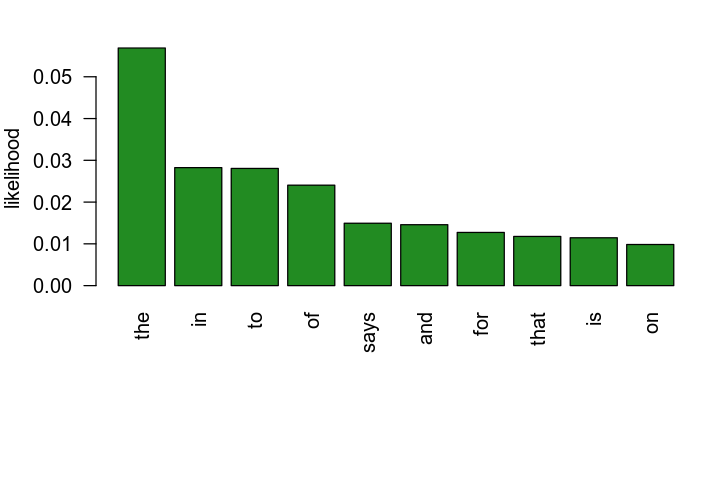

In [40]:
cat("==== Histogram for label 1 ==== \n\n")
histo1_6 <- histo(train_6, 1, vocabulary_6,lname_6,tname_6)

L_6 <- length(vocabulary_6)
histo_plot(histo1_6,(1:10),vocabulary_6)

==== Histogram for label 1 ==== 

 [1] "says"      "state"     "obama"     "percent"   "president" "health"   
 [7] "tax"       "care"      "people"    "years"    


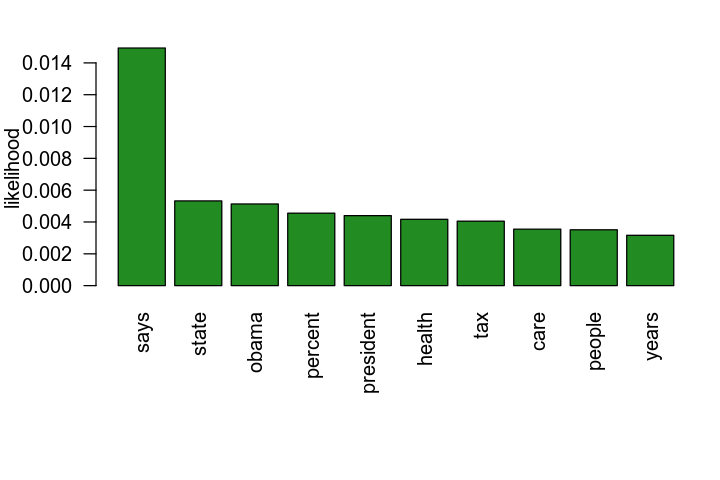

In [41]:
cat("==== Histogram for label 1 ==== \n\n")
histo1_6 <- histo(train_6, 1, vocabulary_sw_6,lname_6,tname_6)

histo_plot(histo1_6,(1:10),vocabulary_sw_6)

## Posterior and classification

In [42]:
score_6 <- naive.bayes('scientists finally tell the truth: vaccine is bad for us, earth is flat',
                     evidence_6, likelihoods_6, priors_6, vocabulary_6, n.classes_6)
ppp_6 <- classifier(score_6, truth.table=truth.table_6, TRUE)
cat('\nThe label of this sentence is:', ppp_6[[1]])

Label 4  :  74.45937 % ( Unknown ) 
Label 1  :  19.83316 % ( False ) 
Label 3  :  2.195802 % ( Mostly True ) 
Label 0  :  1.700991 % ( Barely True ) 
Label 5  :  1.637516 % ( True ) 
Label 2  :  0.1731571 % ( Half True ) 

The label of this sentence is: 4

### Posterior updating

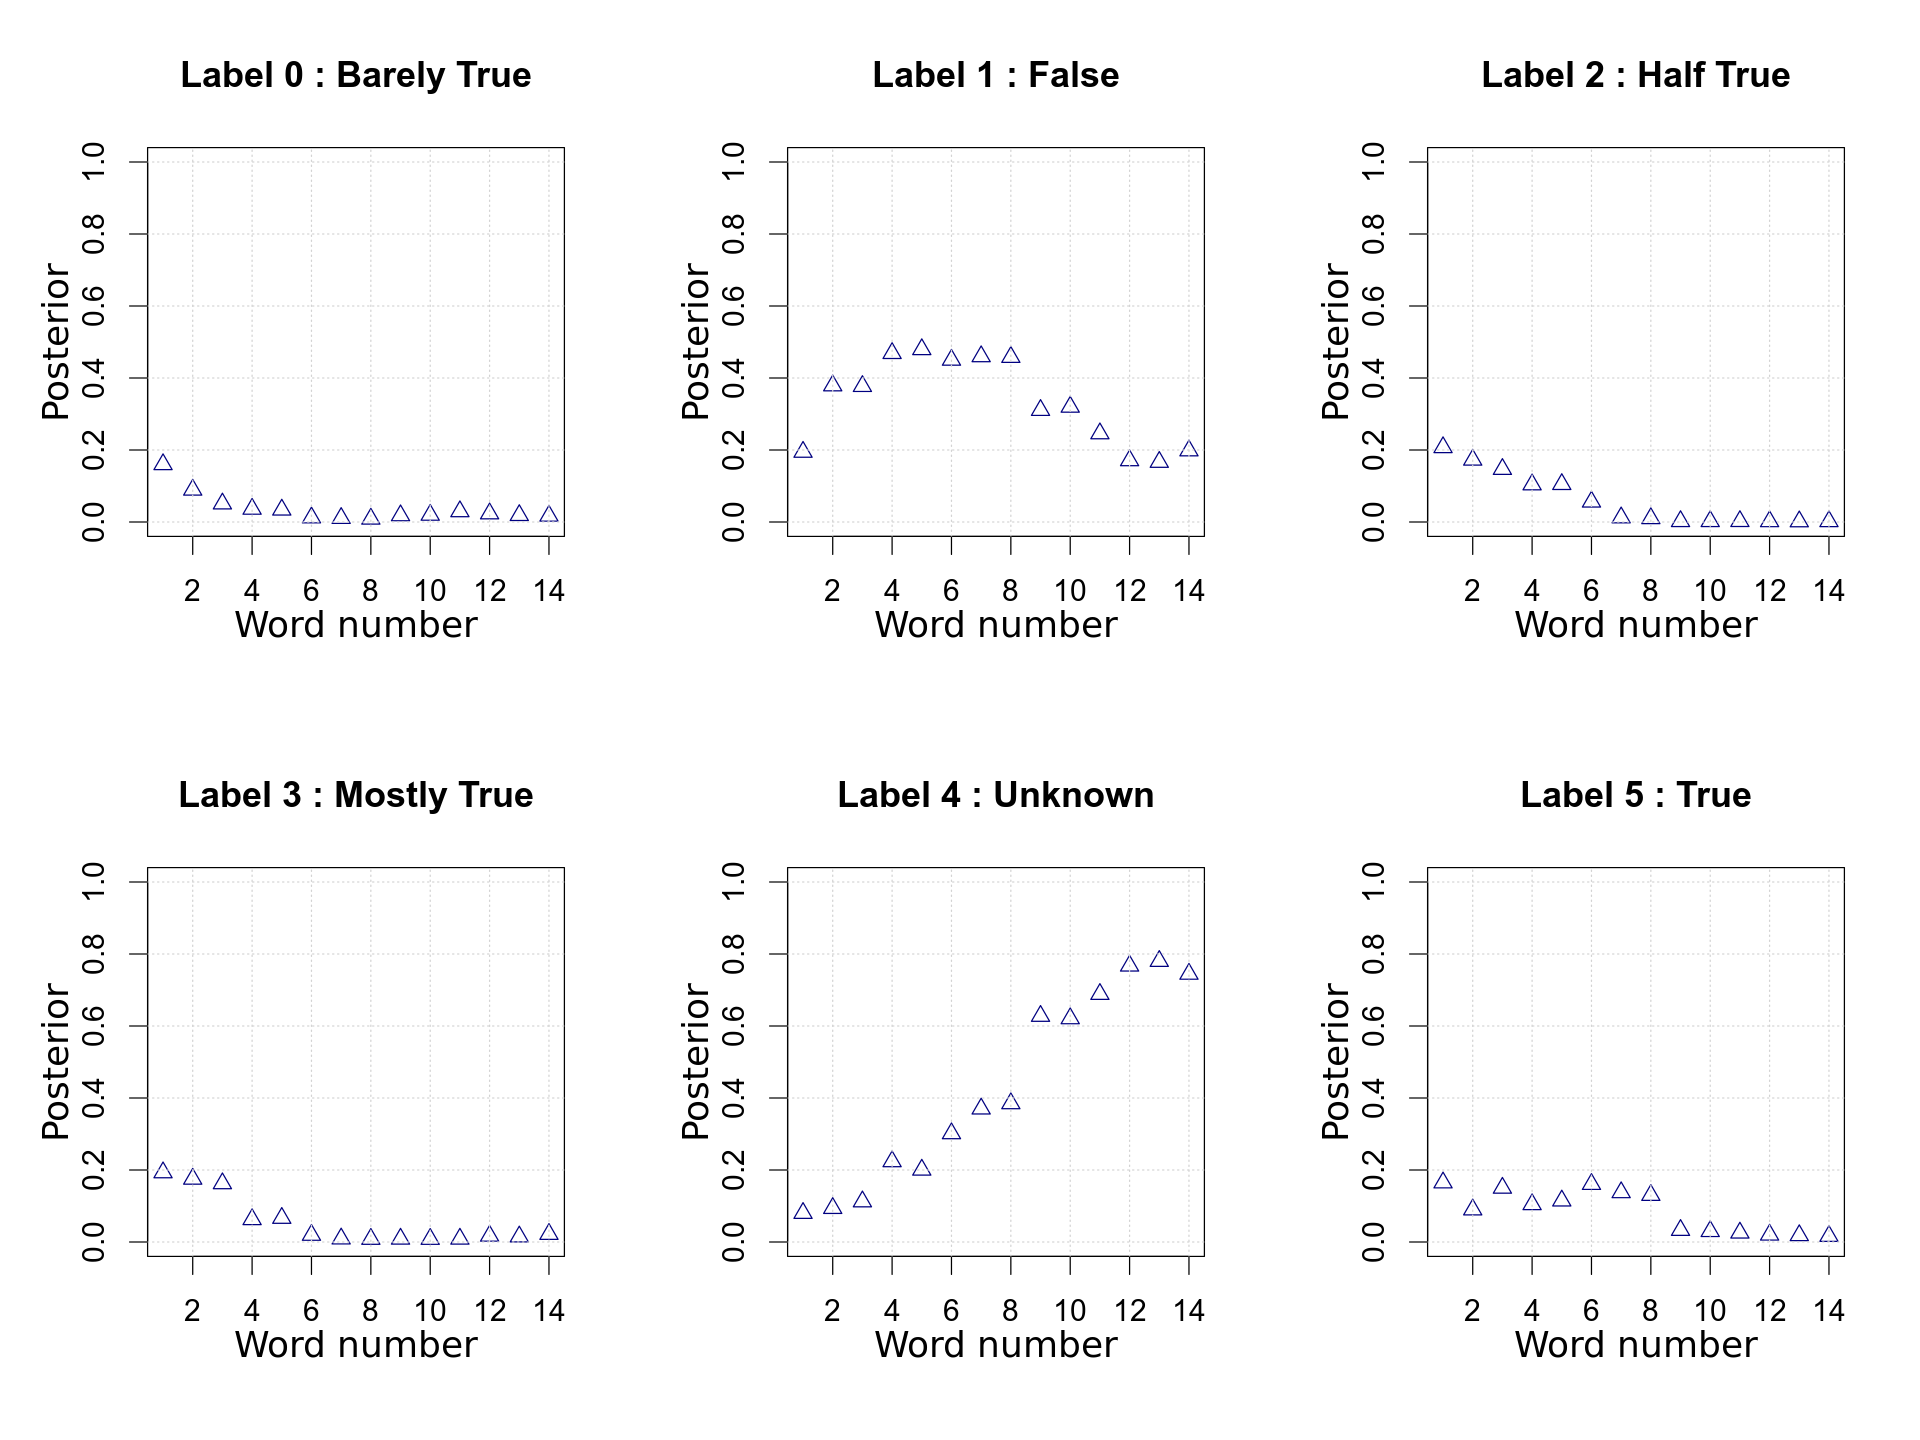

In [43]:
sentence_6 <- 'scientists finally tell the truth: vaccine is bad for us, earth is flat'

posts <- naive.bayes(sentence,evidence_6,likelihoods_6,priors_6,vocabulary_6,n.classes_6,memory=TRUE)
each_step_posteriors_plot(posts, truth.table_6, n.classes_6);

## Results

In [44]:
cat(" ==== Results with priors learned by training set and with stopwords ==== \n")
df_6 <- test.evaluation(test_6, evidence_6, likelihoods_6, priors_6, vocabulary_6, n.classes_6, lname_6, tname_6)
cf_6 <- confusionMatrix( factor(df_6$predictions) , factor(test_6[[lname_6]]) )

cf_6$overall[1]
cat(" ==== Confusion matrix ==== \n")
cf_6$table 
cat("Precision:")
cf_6$byClass[,5]
cat("Recall:")
cf_6$byClass[,6]

 ==== Results with priors learned by training set and with stopwords ==== 


Accuracy 
0.2207031

 ==== Confusion matrix ==== 


          Reference
Prediction   0   1   2   3   4   5
         0  52  70  58  43  16  27
         1  35  55  31  38  17  35
         2  47  48  69  47  10  34
         3  52  51  78  89  15  74
         4 128 119 115  82 112  81
         5  29  57  65  82  12  75

Precision:

Class: 0  Class: 1  Class: 2  Class: 3  Class: 4  Class: 5 
0.1954887 0.2606635 0.2705882 0.2479109 0.1758242 0.2343750

Recall:

Class: 0  Class: 1  Class: 2  Class: 3  Class: 4  Class: 5 
0.1516035 0.1375000 0.1658654 0.2335958 0.6153846 0.2300613

In [45]:
cat(" ==== Results with uniform priors and with stopwords ==== \n")
df_6 <- test.evaluation(test_6, evidence_6, likelihoods_6, c(1/6,1/6,1/6,1/6,1/6,1/6), 
                        vocabulary_6, n.classes_6, lname_6, tname_6)
cf_6 <- confusionMatrix( factor(df_6$predictions) , factor(test_6[[lname_6]]) )

cf_6$overall[1]

 ==== Results with uniform priors and with stopwords ==== 


Accuracy 
0.2006836

In [46]:
# Removing stopwords

cat(" ==== Results with priors learned by training set and with stopwords ==== \n")
df_6 <- test.evaluation(test_6, evidence_sw_6, likelihoods_sw_6, priors_6, vocabulary_sw_6,
                        n.classes_6, lname_6, tname_6, rm=TRUE)
cf_6 <- confusionMatrix( factor(df_6$predictions) , factor(test_6[[lname_6]]) )

cf_6$overall[1]

 ==== Results with priors learned by training set and with stopwords ==== 


Accuracy 
0.2148438

## Reframing as binary classification

A legitimate doubt whenever we apply machine learning is: are the low performances due to an improper training? Since the binary classification was succesful, we test this hypothesis by reframing the test set as binary and computing the score with the likelihoods, priors and evidences as from the training on the binary dataset. 

N.B.: we are assuming that the two datasets are compatible as far as lexicon and thematics are concerned, but this may be incorrect!

In [47]:
head(test_6)

Labels,Text,Text_Tag
5,The Bush tax cuts helped to create a substantial part of the deficit.,"bush-administration,deficit,taxes"
1,We have invested record funding in protecting our environment.,environment
3,$2.4 million of the NIH dollars was spent on origami condoms.,"ebola,public-health"
0,"Says Sen. Sherrod Brown voted to keep an extreme, job-killing Internal Revenue Service paperwork mandate.","jobs,taxes,voting-record"
3,Half of illegal immigrants come on legal visas and then overstay.,immigration
1,"Girl Scouts USAs curriculum promotes Margaret Sanger, founder of Planned Parenthood, Betty Friedan, founder of NARAL Prochoice, and other pro-abortion women as icons for our children to emulate.","abortion,children,sexuality"


In [48]:
# apply this model to 6 classes seen as binary
test.true <- test_6[test_6[['Labels']]==3 | test_6[['Labels']]==5,]
test.false <- test_6[test_6[['Labels']]==0 | test_6[['Labels']]==1,]
test.true$label <- rep(0, nrow(test.true))
test.false$label <- rep(1, nrow(test.false))
test6 <- rbind(test.true, test.false)
test6 <- select(test6, -Labels)
test6 <- rename(test6, text=Text)
test6 <- test6[sample(nrow(test6)),]
head(test6)

text,Text_Tag,label
Rail doesnt do a great job in lessening traffic.,transportation,0
Mark Kirks claim of national security expertise is based on his military record which he lied about at least 10 times.,military,0
Congress only funded half the wall between Mexico and the United States.,immigration,0
Says Michael Cargill was arrested and incarcerated in Bell County.,candidates-biography,1
Most voters prefer zombies to the current U.S. Congress.,congress,0
"The vast, overwhelming majority of [crimes that occur with a firearm] are committed by people who dont legally possess that firearm in the first place.","crime,criminal-justice,guns",0


In [49]:
cat(" ==== Results with stopwords ==== \n")
df <- test.evaluation(test6, evidence_2, likelihoods_2, priors_2, vocabulary_2, n.classes_2, lname_2, tname_2)

cf <- confusionMatrix( factor(df$predictions) , factor(test6[[lname_2]]) )

cf$overall[1]
cat(" ==== Confusion matrix ==== \n")
cf$table 
cf$byClass[5]
cf$byClass[6]

 ==== Results with stopwords ==== 


Accuracy 
0.5117241

 ==== Confusion matrix ==== 


          Reference
Prediction   0   1
         0 521 522
         1 186 221

Precision 
0.4995206

Recall 
0.7369165

In [50]:
cat(" ==== Results without stopwords ==== \n")
df <- test.evaluation(test6, evidence_sw_2, likelihoods_sw_2, priors_2, 
                      vocabulary_sw_2, n.classes_2, lname_2, tname_2)

cf <- confusionMatrix( factor(df$predictions) , factor(test6[[lname_2]]) )

cf$overall[1]

 ==== Results without stopwords ==== 


Accuracy 
0.5062069

Even worse performances than before! It is not a problem of the training set.

### Recomputing prior, likelihood, evidence on the recasted dataset

We even try to simplify the task as a binary classification, computing all terms on the recasted dataset. In this way we can see if the difficulty of this problem lies in its multiclass attribute.

In [51]:
train.true <- train_6[train_6[['Labels']]==3 | train_6[['Labels']]==5,]
train.false <- train_6[train_6[['Labels']]==0 | train_6[['Labels']]==1,]
train.true$label <- rep(0, nrow(train.true))
train.false$label <- rep(1, nrow(train.false))
train6 <- rbind(train.true, train.false)
train6 <- select(train6, -Labels)
train6 <- rename(train6, text=Text)
train6 <- train6[sample(nrow(train6)),]
head(train6)

text,Text_Tag,label
Hillary Clinton is for open borders.,immigration,1
"If you look at the benefits and wages of recorded federal employees, they far outstrip the market rates of the private sector.","federal-budget,jobs",0
More than half of the births in Texas are paid for by Medicaid.,"children,medicaid",0
Barack Obama's church gave a lifetime achievement award to Louis Farrakhan.,religion,0
I am the first Latina to run for governor of Texas.,"candidates-biography,diversity,elections,history",1
Senator Obama has the most liberal voting record in the United States Senate.,candidates-biography,1


In [52]:
vocabulary6 <- pre_process(train6[[tname_2]],voc=TRUE)
vocabulary_sw6 <- rm_stopwords(vocabulary6)

In [53]:
priors6 <- make_priors(train6, lname_2)

# with stopwords
evidence6 <- histo(train6,"all",vocabulary6,lname_2,tname_2)
likelihoods6 <- make_likelihoods(train6, vocabulary6, n.classes_2, lname_2, tname_2)

# without stopwords
evidence_sw6 <- histo(train6,"all",vocabulary_sw6,lname_2,tname_2,rm = TRUE)
likelihoods_sw6 <- make_likelihoods(train6, vocabulary_sw6, n.classes_2, lname_2, tname_2, rm_sw = TRUE)

In [54]:
score_6 <- naive.bayes('scientists finally tell the truth: vaccine is bad for us, earth is flat',
                     evidence6, likelihoods6, priors6, vocabulary6, n.classes_2)
ppp_6 <- classifier(score_6, truth.table=truth.table_2, TRUE)
cat('\nThe label of this sentence is:', ppp_6[[1]])

Label 1  :  73.82472 % ( False ) 
Label 0  :  26.17528 % ( True ) 

The label of this sentence is: 1

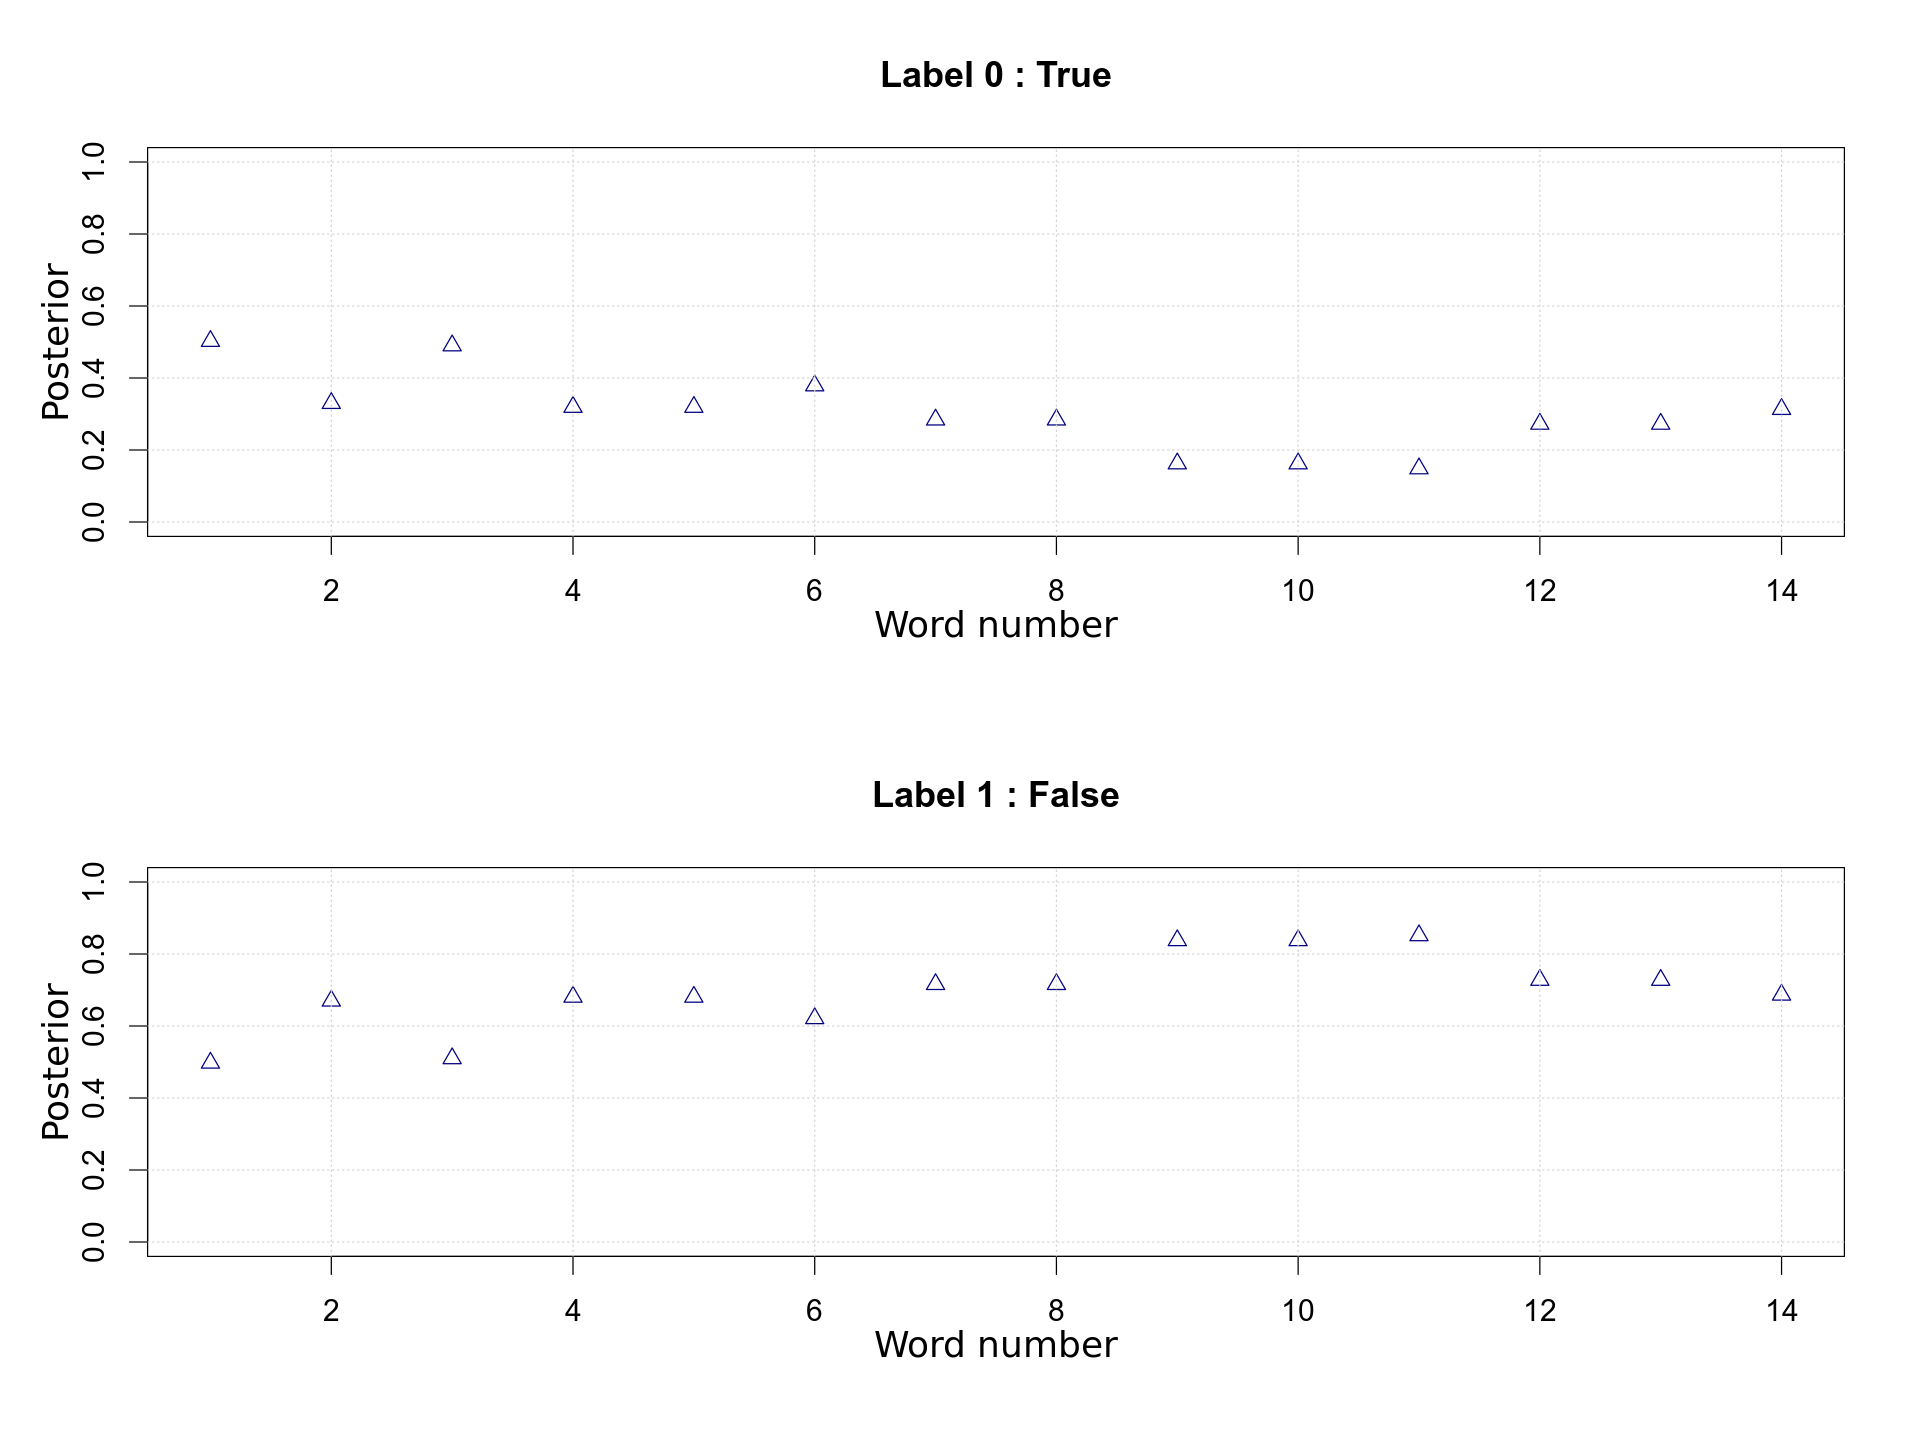

In [55]:
sentence_6 <- 'scientists finally tell the truth: vaccine is bad for us, earth is flat'

posts <- naive.bayes(sentence,evidence_sw6,likelihoods_sw6,priors6,vocabulary_sw6,n.classes_2,memory=TRUE)
each_step_posteriors_plot(posts, truth.table_2, n.classes_2);

In [56]:
cat(" ==== Results with stopwords ==== \n")
df <- test.evaluation(test6, evidence6, likelihoods6, priors6, vocabulary6, n.classes_2, lname_2, tname_2)

cf <- confusionMatrix( factor(df$predictions) , factor(test6[[lname_2]]) )

cf$overall[1]
cat(" ==== Confusion matrix ==== \n")
cf$table 
cf$byClass[5]
cf$byClass[6]

 ==== Results with stopwords ==== 


Accuracy 
     0.6

 ==== Confusion matrix ==== 


          Reference
Prediction   0   1
         0 436 309
         1 271 434

Precision 
0.5852349

Recall 
0.6166902

In [57]:
# Removing stopwords
cat(" ==== Results with stopwords ==== \n")
df <- test.evaluation(test6, evidence_sw6, likelihoods_sw6, priors6, vocabulary_sw6,
                      n.classes_2, lname_2, tname_2, rm=TRUE)

cf <- confusionMatrix( factor(df$predictions) , factor(test6[[lname_2]]) )

cf$overall[1]

 ==== Results with stopwords ==== 


Accuracy 
0.5827586

The performances are slightly better, but not so different from the multiclass approach... <br> We can conlude that this dataset classification is a complex task because of the shortness of its documents.

# CONCLUSIONS


At the end of this work, we can affirm that the naive bayes successed in the binary classification and failed in the multiclass dataset, with the following accuracies:

- accuracy of binary dataset = 0.85
- accuracy of multiclass dataset = 0.22

The wide difference in this two results highlight the difficulty of this technique in a more complex task where we have not only two labels but six classes. 
The main advantages and disadvantages of this algorithm are:

$\textbf{Advantages:}$

- it is easy to implement as you only have to calculate probabilities
- it works on both continuous and discrete data
- it is highly scalable and can easily handle large datasets

$\textbf{Disadvantages:}$

- it is highly dependent on the characteristics of the dataset (lexicon, source, complexity)
- it does not consider the correlations between the words in the same sentence 

Every language has grammar rules and common phrases, but the naive bayes ignore them. At the state of the art, this algorithm treats the sentences like it's just a bag full of words and each message is a random handful of them.
